<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#Connect MongoDB

In [1]:
#https://python-docx.readthedocs.io/en/latest/
!pip install python-docx 
#
!apt install mongodb > /dev/null

     |████████████████████████████████| 5.6 MB 13.0 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=fee1ad2a4d3163f504d95d73dfd42ff894d093e12c1d6095402d6c99a7c2e233
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx




In [2]:
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions

In [3]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
#import dateutil
#import matplotlib.pyplot as plt
#import math
from docx import Document
from docx.shared import Inches
from datetime import datetime
from datetime import timedelta


In [4]:
import p21
import p21utils
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)

p21utils imported
p21utils imported


<module 'p21utils' from '/content/p21utils.py'>

In [6]:
#!cat p21utils.py

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))

Mounted at /content/drive
btncgfi3a5bxyea


,name,type,options,info,idIndex
0,p21Charts,collection,{},"{'readOnly': False, 'uuid': af531836-28c4-4676...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."
1,restaurants,collection,{},"{'readOnly': False, 'uuid': 44fb1466-2fc0-4786...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."


#Retrieve Charts 

In [6]:
kollection = db.p21Charts                   # Set the collection to work with
c = kollection.find({},{'pid.tags':1,'pid.ck':1,'_id':0})
for crnt in c:
    print(crnt)


{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37'}}
{'pid': {'tags': ['Author', 'Homemaker', 'PostGraduate'], 'ck': 'F1965121910:265.522.5788.37'}}
{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M199010923:095.522.5788.37'}}
{'pid': {'tags': ['Biologist', 'Scientist', 'PostGraduate'], 'ck': 'F19909120:525.522.8788.37'}}
{'pid': {'tags': ['Politician', 'Administrator', 'nil'], 'ck': 'M19509179:345.523.4872.36'}}


In [7]:
c = kollection.find({'pid.tags': {"$in": ['Engineer','Teacher']}},{'GLon':1,'GRet':1,'_id':0})
for crnt in c:
    print(crnt)

{'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'GLon': {'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma': 49.966, 'Me': 163.275, 'Ju': 105.898, 'Ve': 166.538, 'Sa': 265.202, 'Ra': 280.65, 'Ke': 100.65}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': False, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}


In [8]:
df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['Engineer','Teacher']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
df

,pid,GLon,GRet
0,{'name': 'uoms'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."
1,{'name': 'raohlo'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."


#Analysis Procedures

In [14]:
def parseChartData(c):

    p21.GLon = c['GLon']
    p21.GRet = c['GRet']
    pid = c['pid']
    p21.pName = pid['name']
    

In [15]:
def AddPage():
    p21.document.add_picture('./CurrentChart.png', width=Inches(4.25))
    p = p21.document.add_paragraph(p21.pName)
    p21.document.add_page_break()

In [13]:
def processChart(c):
    parseChartData(c)
    p21utils.LocateGrahaInRashi()
    p21utils.drawChart_Bengal()
    AddPage()
    #print(c)

#Driver Code

In [11]:
p21.ChartType = 'Rashi'
p21.ReportFile = 'p21Report.docx'

In [27]:
#p21utils.tracer()

10 Jan 2022


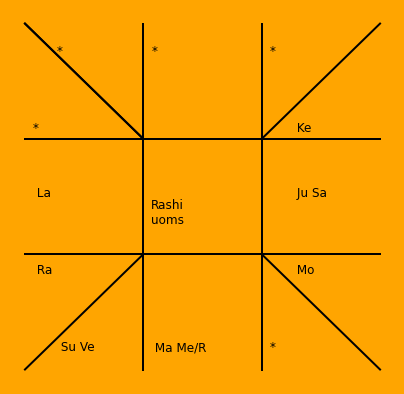

----


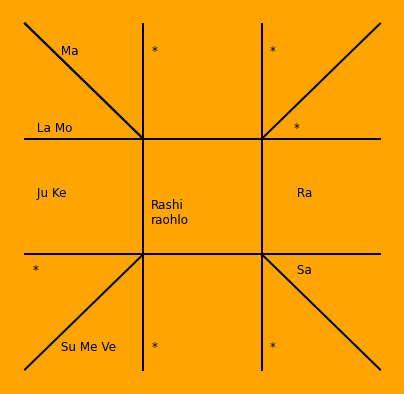

----


In [17]:
p21utils.CreateDocument()
for chart in range(len(df)):
    chartData =df.iloc[chart]
    processChart(chartData)
    print('----')
# ------------------------------------
p21.document.save(p21.ReportFile)